# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 7 submission</b></u>

### Roster Name: Andrew Vu
### Student ID: 015055911
### Email address: andrew.k.vu@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

- https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/
- https://stackoverflow.com/questions/68629457/seaborn-grouped-violin-plot-without-pandas
- https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [138]:
np.random.seed(42)

#### Code the solution

### Load the Dataset

In [139]:
digits = datasets.load_digits()
X = digits.data
X = X.astype("float32") / 255
Y = digits.target
class_names = digits.target_names
X.shape, Y.shape, class_names

((1797, 64), (1797,), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [140]:
digits_df = pd.DataFrame(X, columns=digits.feature_names)
digits_df['output_digit'] = Y
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,output_digit
0,0.0,0.0,0.019608,0.050980,0.035294,0.003922,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.023529,0.050980,0.039216,0.000000,0.000000,0.0,0
1,0.0,0.0,0.000000,0.047059,0.050980,0.019608,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.043137,0.062745,0.039216,0.000000,0.0,1
2,0.0,0.0,0.000000,0.015686,0.058824,0.047059,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.011765,0.043137,0.062745,0.035294,0.0,2
3,0.0,0.0,0.027451,0.058824,0.050980,0.003922,0.0,0.0,0.0,0.031373,...,0.0,0.0,0.0,0.027451,0.050980,0.050980,0.035294,0.000000,0.0,3
4,0.0,0.0,0.000000,0.003922,0.043137,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.007843,0.062745,0.015686,0.000000,0.0,4


### Split data into training and test & stratify

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

### 6 different MLP models

In [142]:
# change to 10000 max iter
model1 = MLPClassifier(random_state=1, max_iter=10000).fit(X_train, Y_train)
model2 = MLPClassifier(hidden_layer_sizes=(400,150,50), activation = 'relu', random_state=1, max_iter=10000).fit(X_train, Y_train)
model3 = MLPClassifier(hidden_layer_sizes=(64,32,8), activation = 'relu', random_state=1, max_iter=10000).fit(X_train, Y_train)
model4 = MLPClassifier(hidden_layer_sizes=(32,16), activation = 'relu', random_state=1, max_iter=10000).fit(X_train, Y_train)
model5 = MLPClassifier(hidden_layer_sizes=(120,64,16), activation = 'relu', random_state=1, max_iter=10000).fit(X_train, Y_train)
model6 = MLPClassifier(hidden_layer_sizes=(320,120,32), activation = 'relu', random_state=1, max_iter=10000).fit(X_train, Y_train)

### Stratified 5-fold cross-val prediction accuracy per fold

In [143]:
cross_vals1 = cross_val_score(model1, X_train, Y_train, cv=5)
cross_vals2 = cross_val_score(model2, X_train, Y_train, cv=5)
cross_vals3 = cross_val_score(model3, X_train, Y_train, cv=5)
cross_vals4 = cross_val_score(model4, X_train, Y_train, cv=5)
cross_vals5 = cross_val_score(model5, X_train, Y_train, cv=5)
cross_vals6 = cross_val_score(model6, X_train, Y_train, cv=5)

print('Individual cross-validation accuracies for Model 1: ' + str(cross_vals1))
print('Individual cross-validation accuracies for Model 2: ' + str(cross_vals2))
print('Individual cross-validation accuracies for Model 3: ' + str(cross_vals3))
print('Individual cross-validation accuracies for Model 4: ' + str(cross_vals4))
print('Individual cross-validation accuracies for Model 5: ' + str(cross_vals5))
print('Individual cross-validation accuracies for Model 6: ' + str(cross_vals6))

Individual cross-validation accuracies for Model 1: [0.96180556 0.98263889 0.95818815 0.96864111 0.96515679]
Individual cross-validation accuracies for Model 2: [0.95486111 0.97569444 0.95121951 0.95818815 0.95121951]
Individual cross-validation accuracies for Model 3: [0.93402778 0.95833333 0.92682927 0.93031359 0.93728223]
Individual cross-validation accuracies for Model 4: [0.9375     0.95486111 0.91289199 0.95121951 0.94425087]
Individual cross-validation accuracies for Model 5: [0.94444444 0.96527778 0.95121951 0.93728223 0.94425087]
Individual cross-validation accuracies for Model 6: [0.94791667 0.97222222 0.94425087 0.95121951 0.95121951]


### Prediction Accuracy for each model on test set

In [144]:
model1accuracy = model1.score(X_test, Y_test)
model2accuracy = model2.score(X_test, Y_test)
model3accuracy = model3.score(X_test, Y_test)
model4accuracy = model4.score(X_test, Y_test)
model5accuracy = model5.score(X_test, Y_test)
model6accuracy = model6.score(X_test, Y_test)

print('Accuracy of MLPClassifier Model1 on test set: {:.2f}'.format(model1accuracy))
print('Accuracy of MLPClassifier Model2 on test set: {:.2f}'.format(model2accuracy))
print('Accuracy of MLPClassifier Model3 on test set: {:.2f}'.format(model3accuracy))
print('Accuracy of MLPClassifier Model4 on test set: {:.2f}'.format(model4accuracy))
print('Accuracy of MLPClassifier Model5 on test set: {:.2f}'.format(model5accuracy))
print('Accuracy of MLPClassifier Model6 on test set: {:.2f}'.format(model6accuracy))

Accuracy of MLPClassifier Model1 on test set: 0.97
Accuracy of MLPClassifier Model2 on test set: 0.95
Accuracy of MLPClassifier Model3 on test set: 0.94
Accuracy of MLPClassifier Model4 on test set: 0.93
Accuracy of MLPClassifier Model5 on test set: 0.95
Accuracy of MLPClassifier Model6 on test set: 0.95


### Setting up the variables for plotting

In [145]:
models = ['Model1', 'Model1', 'Model1', 'Model1', 'Model1', 
          'Model2', 'Model2', 'Model2', 'Model2', 'Model2', 
          'Model3', 'Model3', 'Model3', 'Model3', 'Model3', 
          'Model4', 'Model4', 'Model4', 'Model4', 'Model4', 
          'Model5', 'Model5', 'Model5', 'Model5', 'Model5', 
          'Model6', 'Model6', 'Model6', 'Model6', 'Model6']
models_for_score = ['Model1', 'Model2', 'Model3', 'Model4', 'Model5', 'Model6'] 
modelnumber = [1, 2, 3, 4, 5, 6]
model_accs = [model1accuracy, model2accuracy, model3accuracy, model4accuracy, model5accuracy, model6accuracy]
vals = np.array([cross_vals1, cross_vals2, cross_vals3, cross_vals4, cross_vals5, cross_vals6])
vals = vals.flatten()


### Plotting the cross vals & test set accuracy

AxesSubplot(0.125,0.125;0.775x0.755)


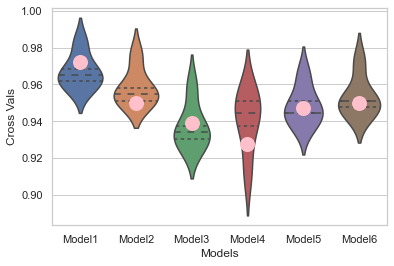

In [146]:
fig, ax = plt.subplots()

# cross vals plot
sns.set(style = 'whitegrid')
vplot = sns.violinplot(x = models, y = vals, inner = "quartile", ax = ax)
vplot.set_xlabel("Models")
vplot.set_ylabel("Cross Vals")

# could not figure out a way for pink X's, so i just used regular dots
# test data accuracy plot
vplot = sns.swarmplot(x = models_for_score, y = model_accs, color = 'pink', edgecolor = 'white', size = 15, ax = ax)

print(vplot)